# **Klasifikasi Kanker Kulit**

**dataset :** https://www.kaggle.com/datasets/salviohexia/isic-2019-skin-lesion-images-for-classification

## **import library**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Mencetak versi TensorFlow
print(tf.__version__)

2.18.0


## **Data Loading**

In [ ]:
!pip install -U gdown
!gdown --id 1dQxeFD7vOuBOAyZNAcDGtV-EgatkVJrP --output isic_2019.zip


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1dQxeFD7vOuBOAyZNAcDGtV-EgatkVJrP
From (redirected): https://drive.google.com/uc?id=1dQxeFD7vOuBOAyZNAcDGtV-EgatkVJrP&confirm=t&uuid=6a3f12f2-2e35-4db3-85bb-373a76daccb1
To: /content/isic_2019.zip
100% 6.44G/6.44G [01:43<00:00, 62.1MB/s]


In [ ]:
# ektrak filenya
!unzip /content/isic_2019.zip -d /content/isic2019

Streaming output truncated to the last 5000 lines.
  inflating: /content/isic2019/isic_2019/NV/ISIC_0009994.jpg  
  inflating: /content/isic2019/isic_2019/NV/ISIC_0009995.jpg  
  inflating: /content/isic2019/isic_2019/NV/ISIC_0009998.jpg  
  inflating: /content/isic2019/isic_2019/NV/ISIC_0010002.jpg  
  inflating: /content/isic2019/isic_2019/NV/ISIC_0010003.jpg  
  inflating: /content/isic2019/isic_2019/NV/ISIC_0010005.jpg  
  inflating: /content/isic2019/isic_2019/NV/ISIC_0010006.jpg  
  inflating: /content/isic2019/isic_2019/NV/ISIC_0010009.jpg  
  inflating: /content/isic2019/isic_2019/NV/ISIC_0010010.jpg  
  inflating: /content/isic2019/isic_2019/NV/ISIC_0010013.jpg  
  inflating: /content/isic2019/isic_2019/NV/ISIC_0010014.jpg  
  inflating: /content/isic2019/isic_2019/NV/ISIC_0010015.jpg  
  inflating: /content/isic2019/isic_2019/NV/ISIC_0010017.jpg  
  inflating: /content/isic2019/isic_2019/NV/ISIC_0010018.jpg  
  inflating: /content/isic2019/isic_2019/NV/ISIC_0010019.jpg  
  in

## **cek gambar setiap folder**

In [ ]:
import os

base_dir = "/content/isic2019/isic_2019"
folder_names = ["AK", "BCC", "BKL", "MEL", "NV", "SCC"]

for folder in folder_names:
    folder_path = os.path.join(base_dir, folder)
    if os.path.exists(folder_path):
        num_images = len([
            f for f in os.listdir(folder_path)
            if os.path.isfile(os.path.join(folder_path, f))
        ])
        print(f"{folder}: {num_images} gambar")
    else:
        print(f"{folder}: Folder tidak ditemukan")


AK: 867 gambar
BCC: 3323 gambar
BKL: 2624 gambar
MEL: 4522 gambar
NV: 5000 gambar
SCC: 628 gambar


## **preprocessing data**

In [ ]:
import os
import random
import shutil
from PIL import Image, ImageEnhance
from tqdm import tqdm

src_base = "/content/isic2019/isic_2019"
dst_base = "/content/balanced_isic"

os.makedirs(dst_base, exist_ok=True)

target_count = 5000

def augment_image(image):

    choice = random.choice(['flip', 'brightness'])

    if choice == 'flip':
        return image.transpose(Image.FLIP_LEFT_RIGHT)

    elif choice == 'brightness':
        enhancer = ImageEnhance.Brightness(image)
        return enhancer.enhance(random.uniform(0.8, 1.2))

for label in os.listdir(src_base):
    src_folder = os.path.join(src_base, label)
    dst_folder = os.path.join(dst_base, label)
    os.makedirs(dst_folder, exist_ok=True)

    images = os.listdir(src_folder)
    images = [img for img in images if img.lower().endswith(('.jpg', '.png', '.jpeg'))]

    print(f"Processing class: {label} ({len(images)} images)")

    if len(images) > target_count:
        selected = random.sample(images, target_count)
        for img_name in selected:
            shutil.copy(os.path.join(src_folder, img_name), os.path.join(dst_folder, img_name))

    elif len(images) < target_count:
        for img_name in images:
            shutil.copy(os.path.join(src_folder, img_name), os.path.join(dst_folder, img_name))

        deficit = target_count - len(images)
        for i in tqdm(range(deficit), desc=f"Augmenting {label}"):
            img_name = random.choice(images)
            img_path = os.path.join(src_folder, img_name)
            with Image.open(img_path) as img:
                aug_img = augment_image(img)
                aug_name = f"aug_{i}_{img_name}"
                aug_img.save(os.path.join(dst_folder, aug_name))

    else:
        for img_name in images:
            shutil.copy(os.path.join(src_folder, img_name), os.path.join(dst_folder, img_name))

print("\n✅ Semua kelas telah disamakan menjadi 4000 gambar per kelas.\n")

print("📊 Jumlah gambar di folder balanced_isic:")
for label in os.listdir(dst_base):
    folder = os.path.join(dst_base, label)
    file_count = len([img for img in os.listdir(folder) if img.lower().endswith(('.jpg', '.png', '.jpeg'))])
    print(f"{label}: {file_count} gambar")


Processing class: BCC (3323 images)


Augmenting BCC: 100%|██████████| 1677/1677 [00:39<00:00, 42.59it/s]


Processing class: BKL (2624 images)


Augmenting BKL: 100%|██████████| 2376/2376 [00:45<00:00, 51.70it/s]


Processing class: SCC (628 images)


Augmenting SCC: 100%|██████████| 4372/4372 [01:31<00:00, 47.64it/s]


Processing class: AK (867 images)


Augmenting AK: 100%|██████████| 4133/4133 [01:37<00:00, 42.28it/s]


Processing class: NV (5000 images)
Processing class: MEL (4522 images)


Augmenting MEL: 100%|██████████| 478/478 [00:10<00:00, 46.84it/s]


✅ Semua kelas telah disamakan menjadi 4000 gambar per kelas.

📊 Jumlah gambar di folder balanced_isic:
BCC: 5000 gambar
BKL: 5000 gambar
SCC: 5000 gambar
AK: 5000 gambar
NV: 5000 gambar
MEL: 5000 gambar


**cek contoh gambar hasil augmentasi**

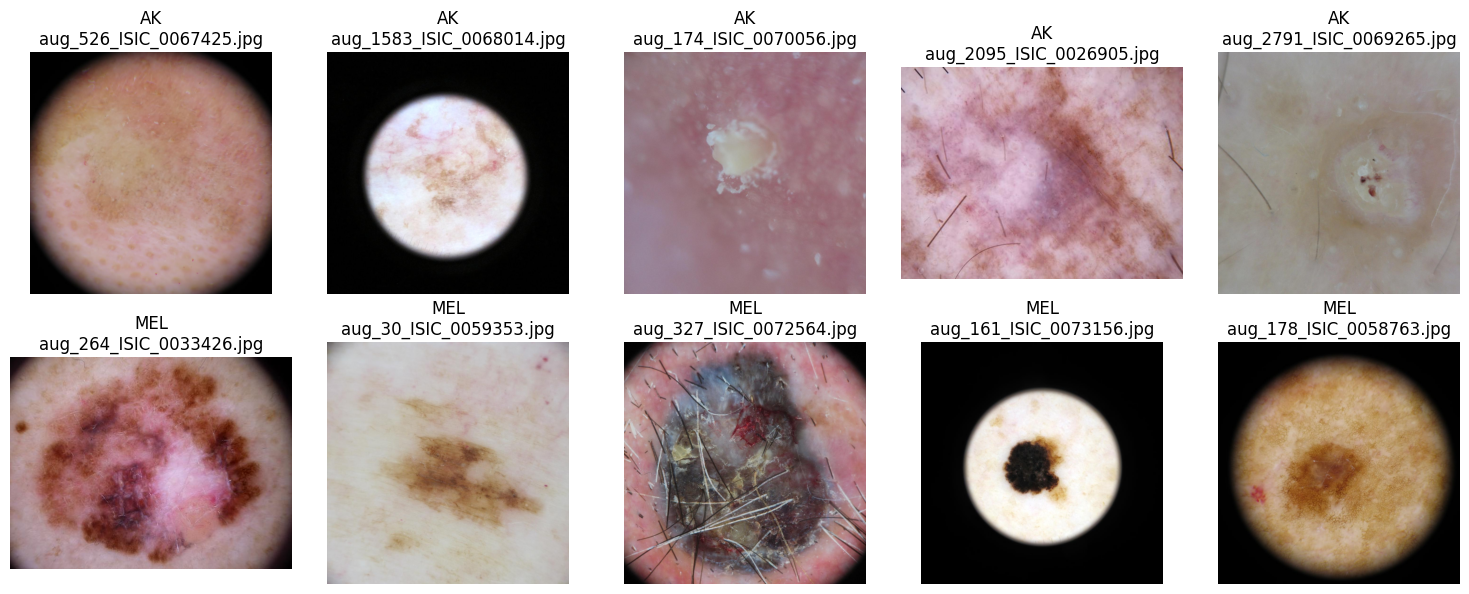

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image


augmented_folders = []

for label in os.listdir(dst_base):
    folder_path = os.path.join(dst_base, label)
    if not os.path.isdir(folder_path):
        continue
    # Cek apakah ada file augmentasi (prefix 'aug_')
    aug_files = [f for f in os.listdir(folder_path) if f.startswith("aug_")]
    if aug_files:
        augmented_folders.append((label, aug_files))

# Pilih dua folder secara acak dari yang ada augmentasinya
selected_folders = random.sample(augmented_folders, 2)

# Tampilkan masing-masing 5 gambar hasil augmentasi
fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for row, (label, aug_files) in enumerate(selected_folders):
    chosen_files = random.sample(aug_files, 5)
    for col, file_name in enumerate(chosen_files):
        img_path = os.path.join(dst_base, label, file_name)
        img = Image.open(img_path)
        axs[row, col].imshow(img)
        axs[row, col].set_title(f"{label}\n{file_name}")
        axs[row, col].axis('off')

plt.tight_layout()
plt.show()


## **pembagian data train dan test**

In [ ]:
import os
import shutil
import random
from pathlib import Path

# Path folder sumber dan tujuan
source_dir = '/content/balanced_isic'
base_output_dir = '/content/dataset_split'
train_dir = os.path.join(base_output_dir, 'train')
val_dir = os.path.join(base_output_dir, 'val')
test_dir = os.path.join(base_output_dir, 'test')

# Membuat folder output
for folder in [train_dir, val_dir, test_dir]:
    os.makedirs(folder, exist_ok=True)

# Rasio pembagian
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Fungsi untuk membagi data
def split_data(class_name):
    src_folder = os.path.join(source_dir, class_name)
    images = os.listdir(src_folder)
    random.shuffle(images)

    total = len(images)
    train_count = int(total * train_ratio)
    val_count = int(total * val_ratio)

    train_images = images[:train_count]
    val_images = images[train_count:train_count+val_count]
    test_images = images[train_count+val_count:]

    for subset_name, subset_images in zip(['train', 'val', 'test'], [train_images, val_images, test_images]):
        dest_folder = os.path.join(base_output_dir, subset_name, class_name)
        os.makedirs(dest_folder, exist_ok=True)
        for img in subset_images:
            shutil.copy(os.path.join(src_folder, img), os.path.join(dest_folder, img))

# Proses semua kelas
classes = os.listdir(source_dir)
for class_name in classes:
    print(f"Processing class: {class_name}")
    split_data(class_name)

# Tampilkan hasil jumlah gambar
from collections import defaultdict

print("\n📊 Jumlah gambar setelah pembagian:")
for subset in ['train', 'val', 'test']:
    print(f"\n📁 {subset.upper()}")
    subset_counts = defaultdict(int)
    for class_name in os.listdir(os.path.join(base_output_dir, subset)):
        class_path = os.path.join(base_output_dir, subset, class_name)
        count = len(os.listdir(class_path))
        subset_counts[class_name] = count
        print(f"{class_name}: {count} gambar")


Processing class: BCC
Processing class: BKL
Processing class: SCC
Processing class: AK
Processing class: NV
Processing class: MEL

📊 Jumlah gambar setelah pembagian:

📁 TRAIN
BCC: 3500 gambar
BKL: 3500 gambar
SCC: 3500 gambar
AK: 3500 gambar
NV: 3500 gambar
MEL: 3500 gambar

📁 VAL
BCC: 750 gambar
BKL: 750 gambar
SCC: 750 gambar
AK: 750 gambar
NV: 750 gambar
MEL: 750 gambar

📁 TEST
BCC: 750 gambar
BKL: 750 gambar
SCC: 750 gambar
AK: 750 gambar
NV: 750 gambar
MEL: 750 gambar


**persiapan modeling**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir = '/content/dataset_split/train'
val_dir = '/content/dataset_split/val'
test_dir = '/content/dataset_split/test'

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.1,
    width_shift_range=0.05,
    height_shift_range=0.05
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)



Found 21000 images belonging to 6 classes.
Found 4500 images belonging to 6 classes.
Found 4500 images belonging to 6 classes.


## **Modeling**

In [ ]:
model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,734 (42.61 MB)

 Trainable params: 11,169,734 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

**uji coba (train)**

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping untuk menghentikan training
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    mode='max',
    restore_best_weights=True,
    verbose=1
)

# Training model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=[early_stop]
)
